# Searching for MobileNetV3 Summary

## [Article](https://arxiv.org/pdf/1905.02244.pdf)

## Authors
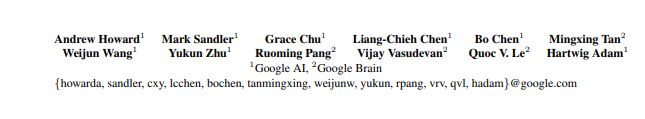

### Abstract

MobileNetV3 is tuned to mobile phone CPUs through a combination of hardwareaware network architecture search (NAS) complemented by the NetAdapt algorithm and then subsequently improved through novel architecture advances. This paper starts the exploration of how automated search algorithms and network design can work together to harness complementary approaches improving the overall state of the art. 

Two models have been released - <b>MobileNetV3-Large and MobileNetV3-Small</b> which are targeted for high and low resource use cases. MobileNetV3-Large is 3.2% more accurate on ImageNet classification while reducing latency by 20% compared to MobileNetV2. MobileNetV3-Small is 6.6% more accurate compared to a MobileNetV2 model with comparable latency. MobileNetV3-Large detection is over 25% faster at roughly the same accuracy as MobileNetV2 on COCO detection. MobileNetV3-Large LRASPP is 34% faster than MobileNetV2 R-ASPP at similar accuracy for Cityscapes segmentation.


These models are then adapted and applied to the tasks of object detection and semantic segmentation. For the task of semantic segmentation (or any dense pixel prediction), the paper proposes a new efficient segmentation decoder Lite Reduced Atrous Spatial Pyramid Pooling (LR-ASPP).

### Introduction
Efficient neural networks are becoming ubiquitous in mobile applications enabling entirely new on-device experiences. They are also a key enabler of personal privacy allowing a user to gain the benefits of neural networks without needing to send their data to the server to be evaluated. Advances in neural network efficiency not only improve user experience via higher accuracy and lower latency, but also help preserve battery life through reduced power consumption.

The goal of this paper is to develop the best possible mobile computer vision architectures optimizing the accuracylatency trade off on mobile devices.

This is accomplished by the introduction of complementary search techniques, new efficient versions of nonlinearities practical for the mobile setting, new efficient network design, a new efficient segmentation decoder, evaluated on a large number of use cases and mobile devices.

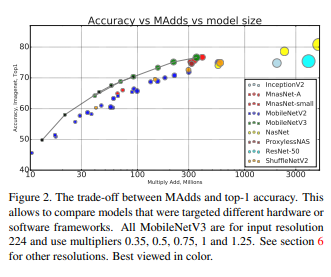

### Related WOrk?

### Efficient Mobile Building Blocks


Mobile models have been built on increasingly more efficient building blocks. MobileNetV1 introduced depthwise separable convolutions as an efficient replacement for traditional convolution layers. Depthwise separable convolutions effectively factorize traditional convolution by separating spatial filtering from the feature generation mechanism. Depthwise separable convolutions are defined by two separate layers: light weight depthwise convolution for spatial filtering and heavier 1x1 pointwise convolutions for feature generation.

MobileNetV2 introduced the linear bottleneck and inverted residual structure in order to make even more efficient layer structures by leveraging the low rank nature of the problem. The input and output are connected with a residual connection if and only if they have the same number of channels.

MnasNet built upon the MobileNetV2 structure by introducing lightweight attention modules based on squeeze and excitation into the bottleneck structure. 

For MobileNetV3, a combination of these layers have been used  as building blocks in order to build the most effective models. 

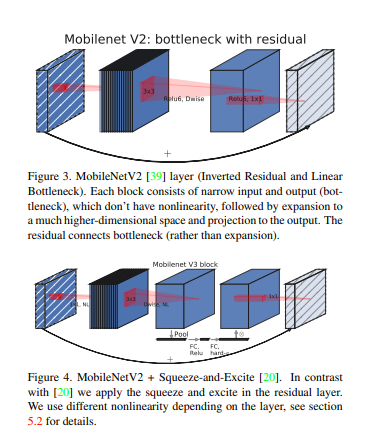


### Network Search

For MobileNetV3 platform-aware NAS is used to search for the global network structures by optimizing each network block. Then the NetAdapt algorithm searches on a per layer basis for the number of filters.

The same RNN-based controller and the same factorized hierarchical search space has been used as MnasNet-A1. For that reason r=it is also used as the initial Large mobile model, and then NetAdapt and other optimizations have been applied on top of it.

However, the original reward design is not optimized for small mobile models. Specifically, it uses a multi-objective reward to approximate Pareto-optimal solutions, by balancing model accuracy ACC(m) and latency LAT(m) for each model m based on the target latency T AR. 

\begin{align}
        ACC(m) × [LAT(m)/T AR]^{w}
    \end{align}

Accuracy changes much more dramatically with latency for small models. Therefore, a smaller weight factor is needed  to compensate for the larger accuracy change for different latencies.

The second technique employed in the architecture search is NetAdapt. This approach is complimentary to platform-aware NAS: it allows fine-tuning of individual layers in a sequential manner, rather than trying to infer coarse but global architecture.


### Network Improvements
The computionally-expensive layers at the beginning and the end of the network have been redesigned and a new nonlinearity, h-swish, a modified version of the recent swish nonlinearity, which is faster to compute has been introduced which is more quantization-friendly.

#### Redesigning Expensive Layers
The first modification reworks how the last few layers of the network interact in order to produce the final features more efficiently. Current models based on MobileNetV2’s inverted bottleneck structure and variants use 1x1 convolution as a final layer in order to expand to a higher-dimensional feature space. This layer is critically important in order to have rich features for prediction. However, this comes at a cost of extra latency. To reduce latency and preserve the high dimensional features, this layer has been moved past the final average pooling. This final set of features is now computed at 1x1 spatial resolution instead of 7x7 spatial resolution. The outcome of this design choice is that the computation of the features becomes nearly free in terms of computation and latency. This makes the previous bottleneck projection layer obsolete and its removal further reduces computational complexity.

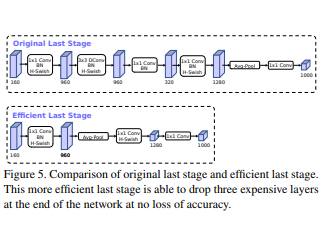



#### Nonlinearities
A nonlinearity called swish was introduced
that when used as a drop-in replacement for ReLU
significantly improves the accuracy of neural networks. The
nonlinearity is defined as:

\begin{align}
        swish x = x · σ(x)
    \end{align}


While this nonlinearity improves accuracy, it comes with
non-zero cost in embedded environments as the sigmoid
function is much more expensive to compute on mobile devices.

This is dealth with by replacing the sigmoid function with its piece-wise linear
hard analog with the minor difference of using RELU6 rather than a custom clipping constant: 

\begin{align}
        h-swish[x] = x \frac{ReLU6(x + 3) }{6}
    \end{align}


#### MobileNetsV3 Definitions
MobileNetV3 is defined as two models: MobileNetV3-Large and MobileNetV3-Small. These models are targeted at high and low resource use cases respectively. The models are created through applying platform-aware NAS and NetAdapt for network search and incorporating the network improvements.

### Experiments
#### Classification
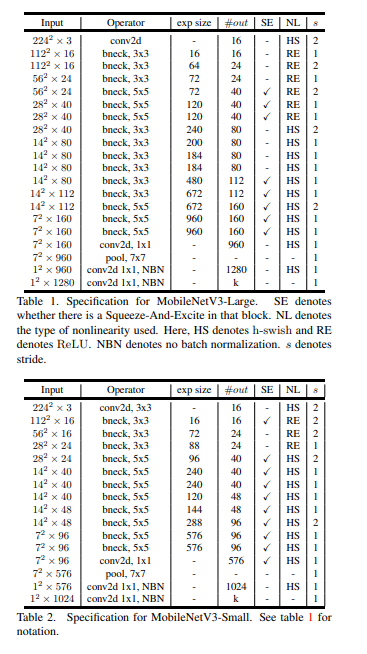


##### Training
Synchronous training setup on
4x4 TPU Pods using standard tensorflow RMSPropOptimizer with 0.9 momentum, initial learning rate
of 0.1, with batch size 4096 (128 images per chip), learning rate decay rate of 0.01 every 3 epochs, dropout of 0.8, l2 weight decay 1e-5, exponential moving average with decay 0.9999 and the same image preprocessing as Inception.

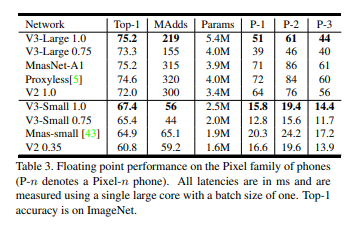

##### Measurement
To measure latencies standard Google Pixel phones are used and all networks are ran through the TFLite Benchmark Tool. Only single-threaded large cores have been used in the measurements.

##### Results 
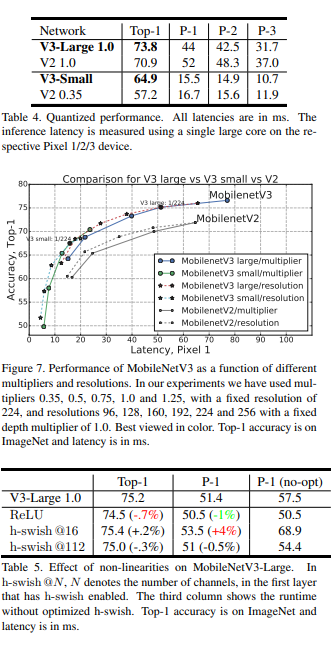

#### Detection
MobileNetV3 is used as a drop-in replacement for the backbone feature extractor in SSDLite [39] and compared with other backbone networks on COCO dataset. The first layer of SSDLite is attached to the last feature extractor layer that has an output stride of 16 (C4), and the second layer of SSDLite is attached to the last feature extractor layer that has an output stride of 32 (C5). For MobileNetV3-Large, C4 is the expansion layer of the 13-th bottleneck block. For MobileNetV3-Small, C4 is the expansion layer of the 9-th bottleneck block. For both networks, C5 is the layer immediately before pooling. The channel counts of all feature layers between C4 and C5 have been reduced by 2 s because the last few layers of MobileNetV3 are tuned to output 1000 classes, which may be redundant when transferred to COCO with 90 classes. 

MobileNetV3-Large is 27% faster than MobileNetV2 with near identical mAP. MobileNetV3-Small with channel reduction is also 2.4 and 0.5 mAP higher than MobileNetV2 and MnasNet while being 35% faster. For both MobileNetV3 models the channel reduction trick contributes to approximately 15% latency reduction with no mAP loss, suggesting that Imagenet classification and COCO object detection may prefer different feature extractor shapes.

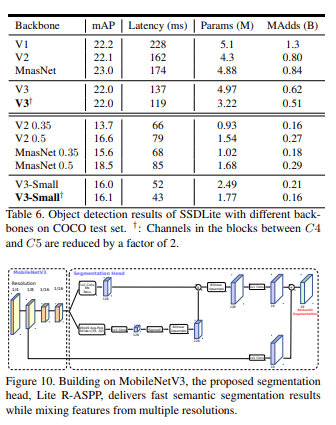


#### Semantic Segmentation

Two segtemntation heads have been compared:


- The first one, referred to as R-ASPP is a reduced design of the Atrous Spatial Pyramid Pooling module, which adopts only two branches consisting of a 1 × 1 convolution and a global-average pooling operation. 


- Second one is another light-weight segmentation head, referred to as Lite R-ASPP (or LR-ASPP), improving over R-ASPP by
deploying the global-average pooling in a fashion similar to the Squeeze-and-Excitation module, in which a large pooling kernel has been employed with a large stride (to save some computation) and only one 1×1 convolution in the module.


Atrous convolution has been applied to the last block of MobileNetV3 to extract denser features, and further add a skip connection from low-level features to capture more detailed information.


The experiments have been conducted on the Cityscapes dataset with metric mIOU. All our models are trained from scratch without pretraining on ImageNet, and are evaluated with a single-scale input. Similar to object detection,  the channels in the last block of network backbone can be reduced by a factor of 2 without degrading the performance significantly.

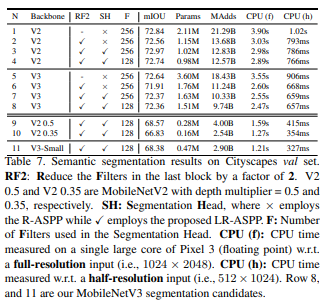


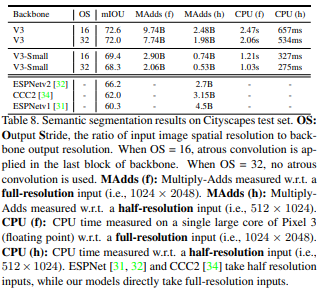




#### Conclusion asn future work
This paper has introduced MobileNetV3 Large and Small models demonstrating new state of the art in mobile classification, detection and segmentation. It harnesses multiple network architecture search algorithms as well as advances in network design to deliver the next generation of mobile models. It shows how to adapt nonlinearities like swish and apply squeeze and excite in a quantization friendly and efficient manner introducing them into the mobile model domain as effective tools. A new form of
lightweight segmentation decoders called LR-ASPP has also been introduced..

### Reproduction
The code for both V3 Large and small is available in both Pytorch and Keras. I utilize MobileNetV3 small in my course project due to my limited computational power, although it is not used exactly as it was meant to due to my use of x-ray images as a dataset. MobileNet has seen some use in the medical field however as this article here showcases -  [Classification of COVID-19 chest X-Ray and CT images using a type of dynamic CNN modification method](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8081579/#fn1). MobileNet has boith the best performance and the least demang in terms of computational power.

There is a cool google Colab notebook setup with examples of the networks (V2) and some of their competitors in action - [Notebook link](https://colab.research.google.com/github/tensorflow/models/blob/master/research/deeplab/deeplab_demo.ipynb).

I find it very interesting to see what happens when you pass it an mage it would have no knowledge of. This chest xray for example is apparently a combination of a chair and a TV - https://www.bmj.com/content/bmj/370/bmj.m2426/F1.large.jpg
